In [17]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/femianjc/anaconda2/envs/femiani/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [95]:
import pandas as pd
import itertools
from IPython.core import display as ICD
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import Imputer
from sklearn.metrics import confusion_matrix, classification_report, log_loss

In [39]:
n_splits = 8
animals = pd.read_csv('animals.csv')
data, validate = train_test_split(animals, test_size=1/n_splits)

In [40]:
def run_skf(data, n_splits=10):
    skf = StratifiedKFold(n_splits, random_state=8, shuffle=True)
    t = data.OutcomeType
    train, test = [], []
    for train_index, validate_index in skf.split(np.zeros(len(t)), t):
        train.append(data.loc[train_index])
        test.append(data.loc[validate_index])
    return train, test

In [41]:
def visualize_folds(data, train, test):
    print('Total number of samples:{}\n'.format(len(data)))
    print('Training sample size per fold:')
    summary = pd.DataFrame([
        f.groupby('OutcomeType')
        .count()
        .AnimalID.rename('Fold {}'.format(i+1)) 
        for i, f in enumerate(train)])
    summary['Any'] = summary.sum(axis=1)
    summary.columns = summary.columns.rename('')
    ICD.display(summary)

    print('Test samples per fold:')
    summary = pd.DataFrame([
        f.groupby('OutcomeType')
        .count()
        .AnimalID.rename('Fold {}'.format(i+1)) 
        for i, f in enumerate(test)])
    summary['Any'] = summary.sum(axis=1)
    summary.columns = summary.columns.rename('')
    ICD.display(summary)

In [44]:
train, test = run_skf(data, n_splits=n_splits)
visualize_folds(data, train, test)

Total number of samples:26729

Training sample size per fold:


,Adoption,Died,Euthanasia,Return_to_owner,Transfer,Any
Fold 1,9371,171,1346,4217,8280,23385
Fold 2,9407,167,1361,4213,8238,23386
Fold 3,9446,170,1364,4172,8235,23387
Fold 4,9412,176,1353,4217,8230,23388
Fold 5,9431,173,1358,4177,8249,23388
Fold 6,9455,175,1360,4189,8210,23389
Fold 7,9467,176,1364,4149,8234,23390
Fold 8,9394,171,1379,4168,8278,23390


Test samples per fold:


,Adoption,Died,Euthanasia,Return_to_owner,Transfer,Any
Fold 1,1398,26,209,569,1142,3344
Fold 2,1362,30,194,573,1184,3343
Fold 3,1323,27,191,614,1187,3342
Fold 4,1357,21,202,569,1192,3341
Fold 5,1338,24,197,609,1173,3341
Fold 6,1314,22,195,597,1212,3340
Fold 7,1302,21,191,637,1188,3339
Fold 8,1375,26,176,618,1144,3339


In [89]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.xticks(rotation=90)

In [ ]:
from sklearn.preprocessing import 

('Train log loss:', 8.3182548067623276)
('Test log loss:', 11.092896485686031)
                 precision    recall  f1-score   support

       Adoption       0.70      0.86      0.77      1398
           Died       0.00      0.00      0.00        26
     Euthanasia       0.70      0.03      0.06       209
Return_to_owner       0.52      0.44      0.47       569
       Transfer       0.72      0.71      0.72      1142

    avg / total       0.67      0.68      0.65      3344

('Train log loss:', 8.2809766204679853)
('Test log loss:', 10.858586297053886)
                 precision    recall  f1-score   support

       Adoption       0.70      0.85      0.77      1362
           Died       0.00      0.00      0.00        30
     Euthanasia       0.70      0.04      0.07       194
Return_to_owner       0.51      0.40      0.45       573
       Transfer       0.74      0.75      0.74      1184

    avg / total       0.67      0.69      0.66      3343

('Train log loss:', 8.4652271046148755

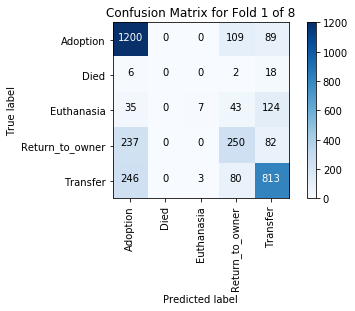

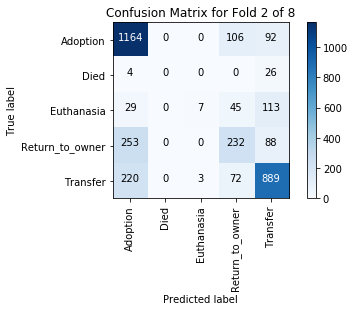

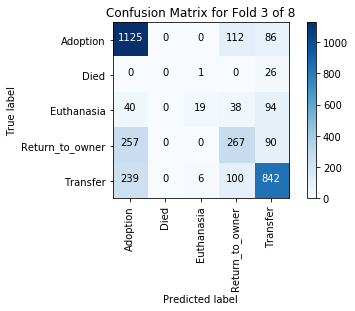

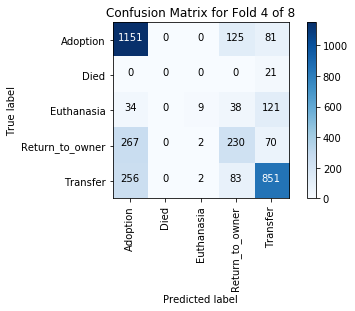

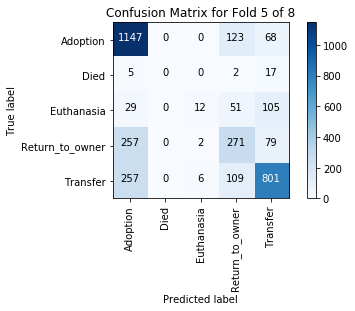

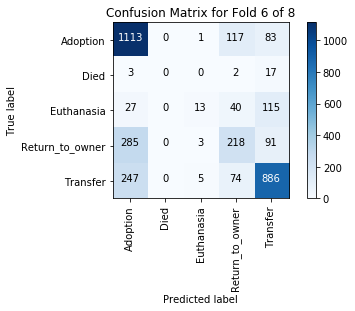

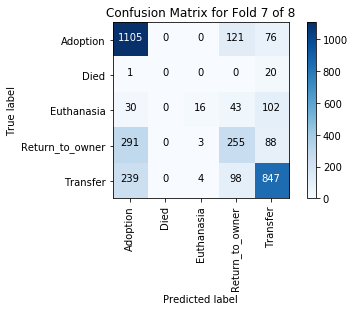

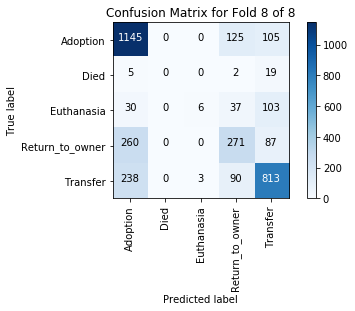

In [111]:
imputer = Imputer(strategy='median')

target_names = sort(animals.OutcomeType.unique())
avg_log_loss_train = 0
avg_log_loss_test = 0

for i in range(n_splits):
    clf = RandomForestClassifier(n_estimators=20,max_depth=20, random_state=8, min_samples_split=5, min_samples_leaf=5)
    
    train_dummies = imputer.fit_transform(pd.get_dummies(train[i].iloc[:,11:]))    
    test_dummies = imputer.fit_transform(pd.get_dummies(test[i].iloc[:,11:]))
    
    clf.fit(train_dummies, train[i].OutcomeType)
    
    pred_train = clf.predict(train_dummies)
    pred_test = clf.predict(test_dummies)
    
    pred_train = pd.Categorical(pred_train, categories=target_names)
    pred_test = pd.Categorical(pred_test, categories=target_names)
    
    k1_train = pd.get_dummies(pred_train)
    k1_test = pd.get_dummies(pred_test)
    k1_train = k1_train.reindex_axis(sorted(k1_train.columns), axis=1)
    k1_test = k1_test.reindex_axis(sorted(k1_test.columns), axis=1)
    
    log_loss_train = log_loss(pd.get_dummies(train[i].OutcomeType), k1_train)
    log_loss_test = log_loss(pd.get_dummies(test[i].OutcomeType), k1_test)
    
    print('Train log loss:', log_loss_train)
    print('Test log loss:', log_loss_test)
    
    avg_log_loss_train += log_loss_train
    avg_log_loss_test += log_loss_test
    
    print(classification_report(test[i].OutcomeType.tolist(), 
                                pred_test, target_names=target_names))

    cm = confusion_matrix(test[i].OutcomeType.tolist(), pred_test, labels=target_names)
    plot_confusion_matrix(
        cm, target_names,
        title='Confusion Matrix for Fold {0} of {1}'.format(i+1, len(train)))

avg_log_loss_train /= len(train)
avg_log_loss_test /= len(test)
print('Avg. train log loss:', avg_log_loss_train)
print('Avg. test log loss:', avg_log_loss_test) 
    

In [104]:
from multiprocessing import Pool

def iteration(i):
    df['AgeInDaysNoisy'] = df.AgeInDays.apply(mimic_continuous, epsilon = i/100)
    train, validate = create_train_validate_sets(df, 3)
    features = ['AnimalType', 'Sex', 'Genitals', 'HasName', 'Milestone', 
                'AgeInDaysCategorical', 'AgeInDaysNoisy']
    (t, v) = train_with_logistic_regression(
        train, validate, target_names, features, 
        use_class_weight=False, show_results=False)
    return (i/100, t, v)

stop, step = 200, 2
range_ = range(0, stop+step, step)
p = Pool(processes=8)
result = p.map(iteration, range_)

ln_loss = pd.DataFrame(result, columns=['epsilon', 'train','validate'])
ln_loss = pd.melt(ln_loss, id_vars=['epsilon'], value_vars=['train', 'validate'])

(ggplot(ln_loss, aes(x='epsilon', y='value', color='variable'))
 + geom_line(size=1)
 + theme_seaborn()
 + theme(panel_grid_minor = element_line(size=0.5))
).draw().set_size_inches(10, 3)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)